In [93]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and filter 

In [97]:
df = pd.read_csv('output/training_logs.csv')
# df = df[]

# shorten all runs to max 30 epochs
df = df[df['Epoch']<=30]

# drop all runs which have less than 3 epochs
df = df.groupby(['model', 'timestamp']).filter(lambda x: len(x)>=3)
df

,timestamp,model,Training Loss,Epoch,Step,Validation Loss,Accuracy,F1,model_path,samples_per_s,steps_per_s,colab,per_device_train_batch_size,per_device_eval_batch_size,split,target_map
0,2024-04-03_15-00,distilbert-base-cased,0.694,1.0,780,0.647,0.737,0.438,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN
1,2024-04-03_15-00,distilbert-base-cased,0.511,2.0,1560,0.722,0.704,0.544,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN
2,2024-04-03_15-00,distilbert-base-cased,0.286,3.0,2340,0.901,0.703,0.531,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN
3,2024-04-03_15-00,distilbert-base-cased,0.160,4.0,3120,1.438,0.719,0.549,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN
4,2024-04-03_15-00,distilbert-base-cased,0.100,5.0,3900,1.663,0.709,0.528,output/models/distilbert-base-cased_2024-04-03...,473.109,29.593,False,16,64,"(80, 10, 10)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2024-04-05_14-14,distilbert-base-cased,0.058,6.0,5262,1.677,0.736,0.671,output/models/distilbert-base-cased_2024-04-05...,481.285,30.087,False,16,64,"(0.9, 0.1)","{'Pathos': 0, 'No_pathos': 1}"
308,2024-04-05_14-14,distilbert-base-cased,0.035,7.0,6139,1.898,0.720,0.676,output/models/distilbert-base-cased_2024-04-05...,481.285,30.087,False,16,64,"(0.9, 0.1)","{'Pathos': 0, 'No_pathos': 1}"
309,2024-04-05_14-14,distilbert-base-cased,0.023,8.0,7016,2.287,0.734,0.679,output/models/distilbert-base-cased_2024-04-05...,481.285,30.087,False,16,64,"(0.9, 0.1)","{'Pathos': 0, 'No_pathos': 1}"
310,2024-04-05_14-14,distilbert-base-cased,0.015,9.0,7893,2.356,0.724,0.662,output/models/distilbert-base-cased_2024-04-05...,481.285,30.087,False,16,64,"(0.9, 0.1)","{'Pathos': 0, 'No_pathos': 1}"


## Checklatest

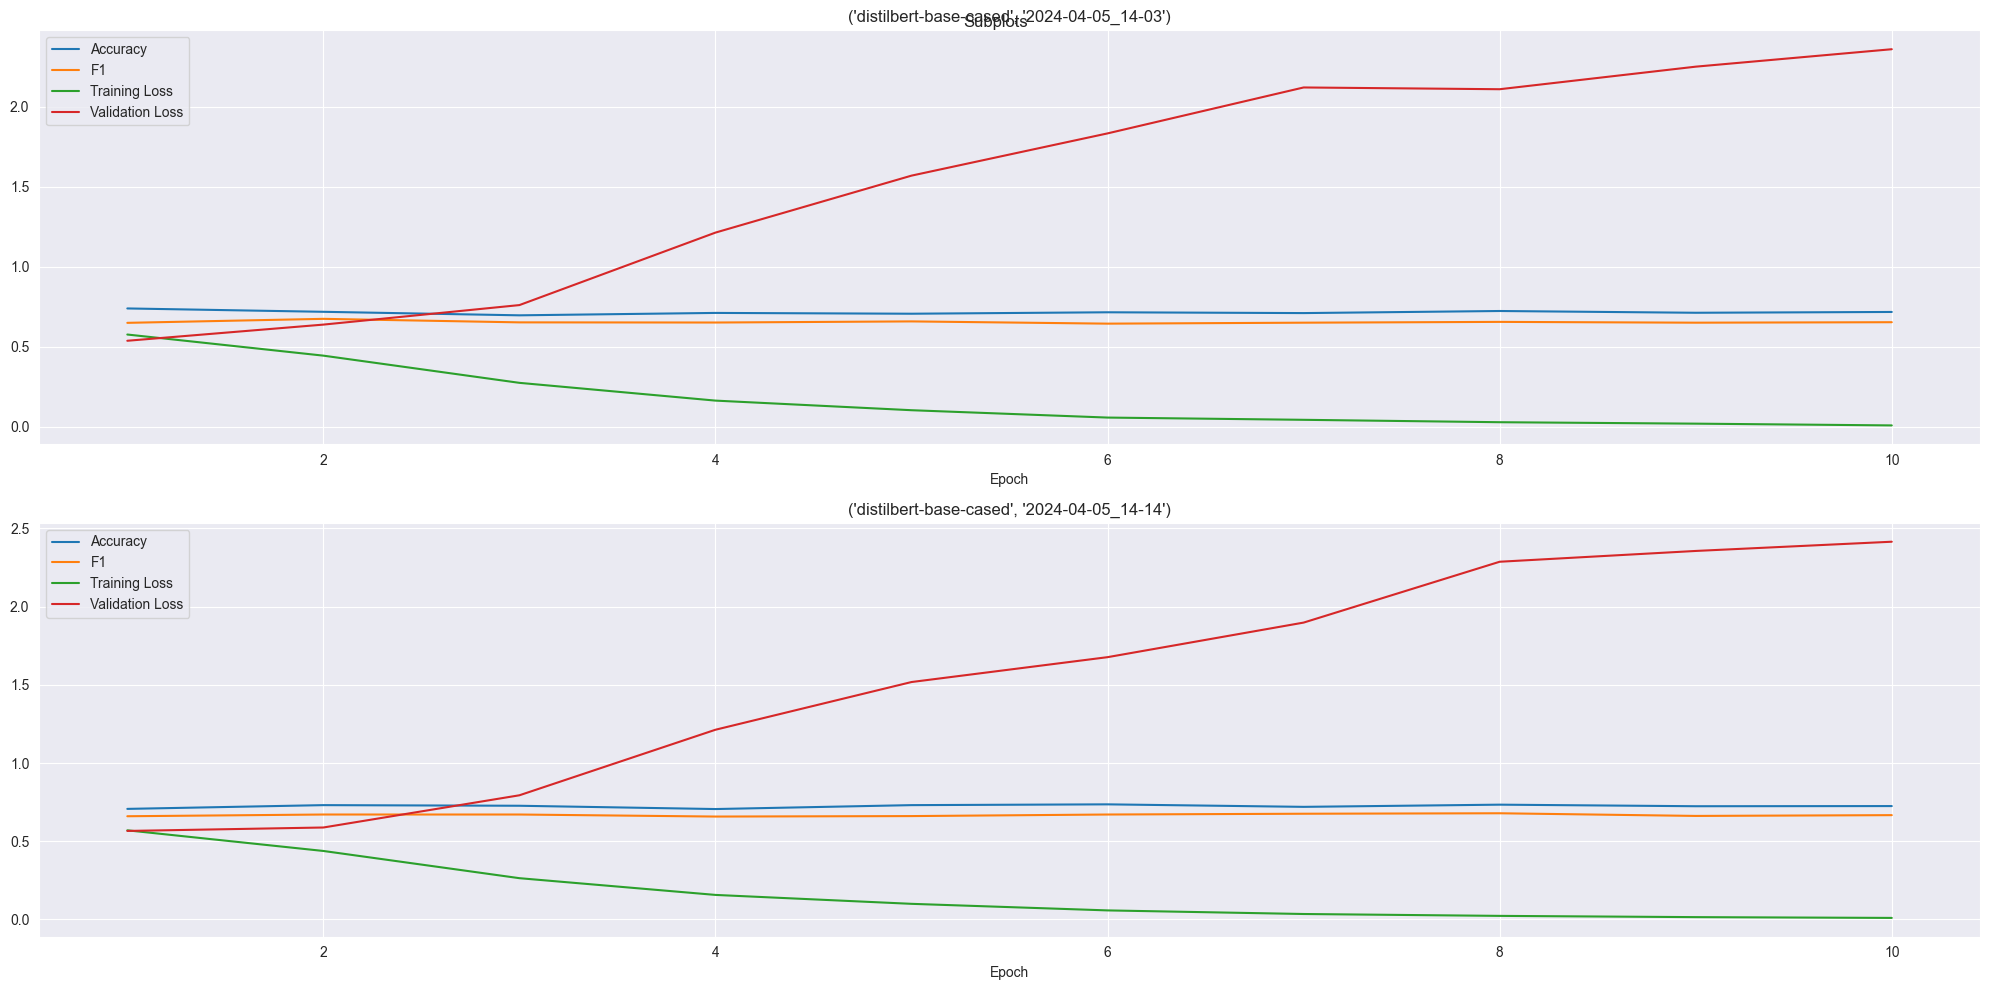

In [105]:
last_n_runs = 2

# pd.to_datetime(df.timestamp, format="%Y-%m-%d_%H-%M").sort_values(ascending=False).unique()
last_n = df.timestamp.sort_values(ascending=False).unique()[:last_n_runs]
grouped = df[df['timestamp'].isin(last_n)].groupby(['model', 'timestamp'])

# Individual subplots
fig, axes = plt.subplots(nrows=len(grouped.groups), ncols=1, figsize=(20, 10))
for (group_name, group_df), ax in zip(grouped, axes):
    group_df.plot(y=['Accuracy', 'F1', 'Training Loss', 'Validation Loss'], x='Epoch', ax=ax, title=f"{group_name}").legend(loc='upper left')

plt.tight_layout()
plt.suptitle("Subplots")
plt.show()

# Plot one feature for all

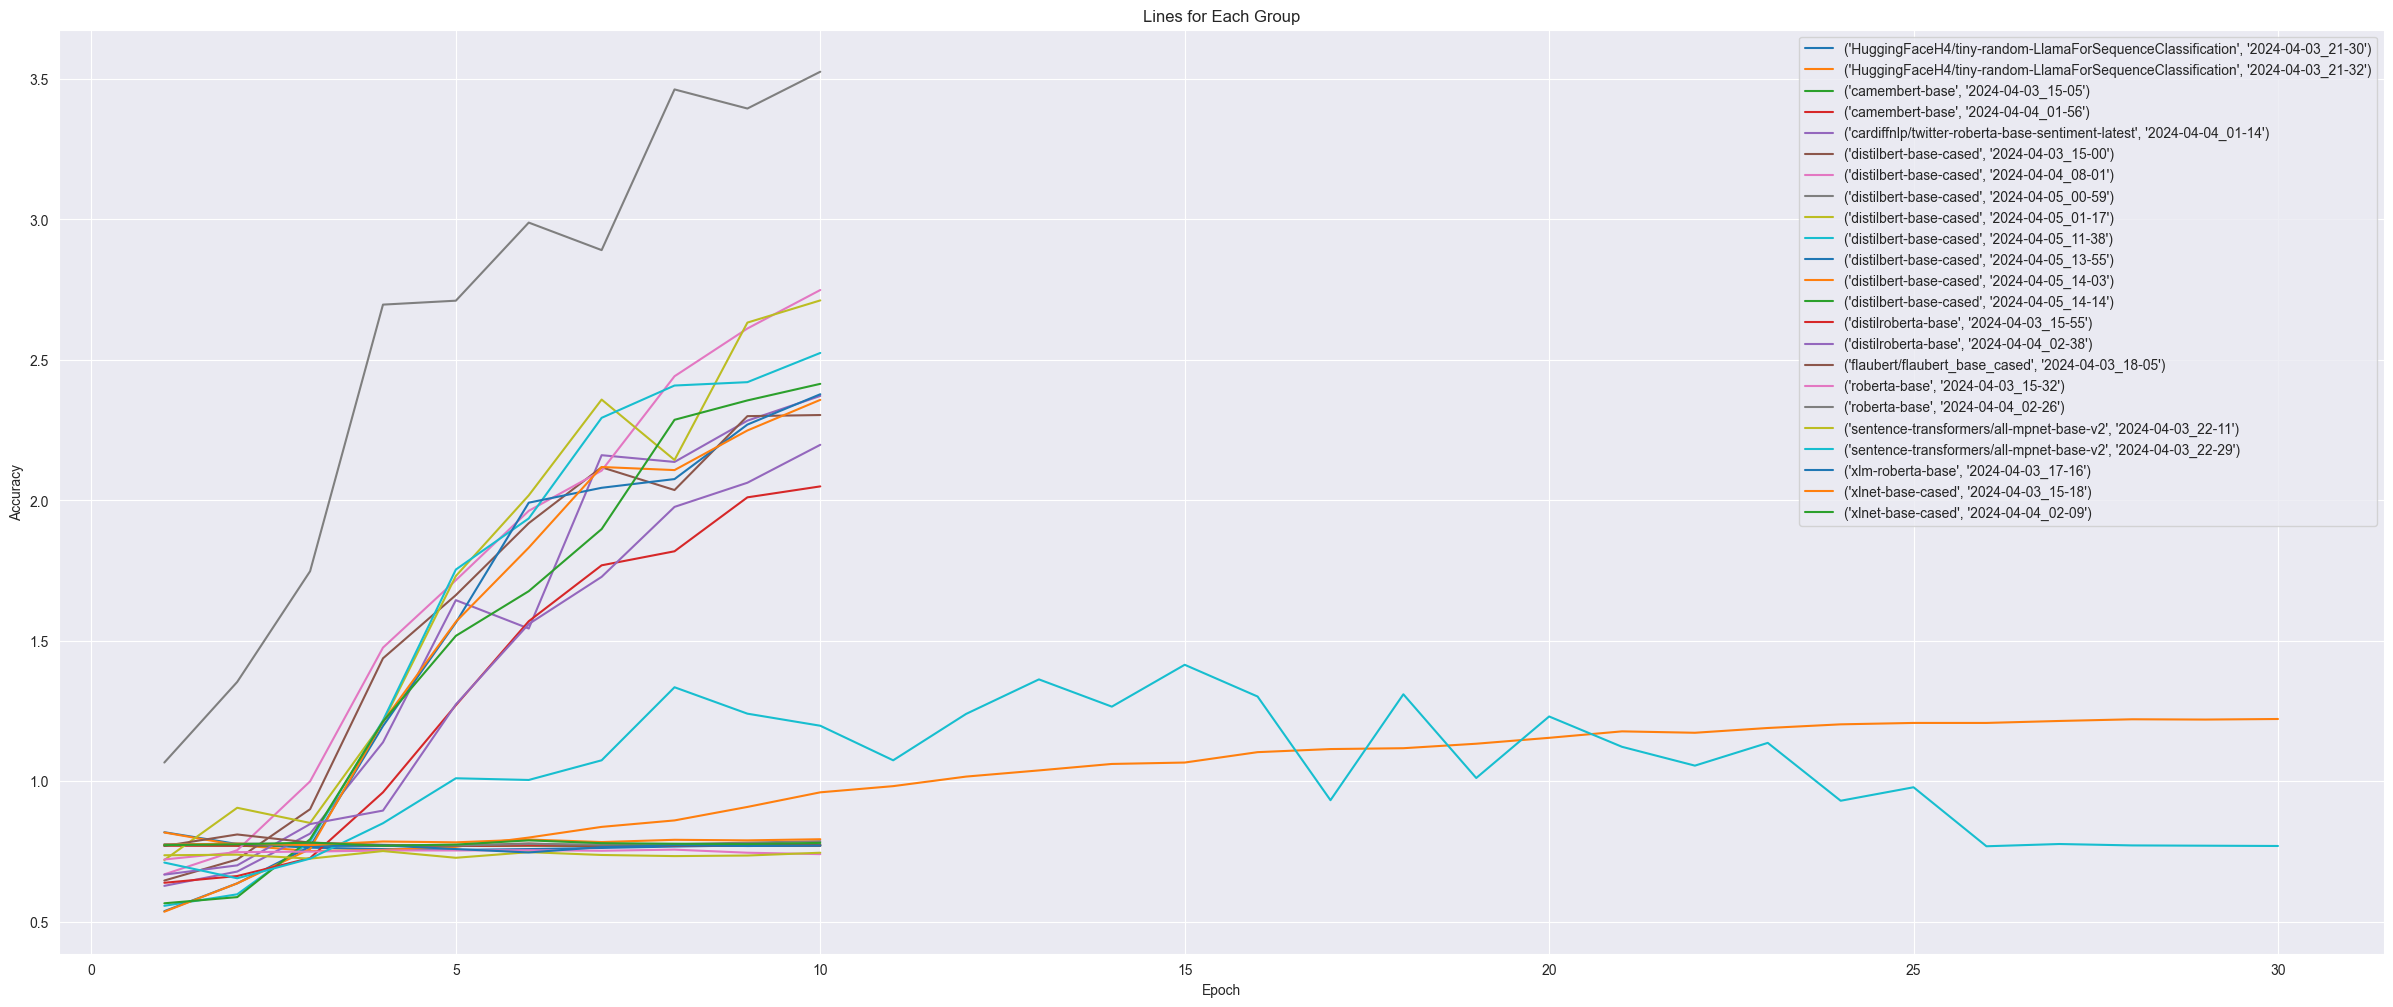

In [115]:
col_to_plot = 'Validation Loss'
grouped = df.groupby(['model', 'timestamp'])

plt.figure(figsize=(30,12))
for name, group_df in grouped:
    plt.plot(group_df['Epoch'], group_df[col_to_plot], label=name)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Lines for Each Group')
plt.legend()
plt.show()